In [1]:
%config IPCompleter.greedy = True
from sklearn import datasets
data = datasets.load_iris()
#อธิบาย dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

ดู Label ข้อมูล

In [2]:
data.target #0 = Setosa 1 = Versicolour 2 = Virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

ตรวจสอบข้อมูลของเราก่อนว่าข้อมูลแต่ละ Label เป็นข้อมูลที่ดีพอจะใช้งาน โดยเราจะพล็อตข้อมูลของเราบนกราฟ โดยถ้าข้อมูลของเราดีพอที่จะใช้งาน ข้อมูลแต่ละ Label/Class จะแยกออกจากกันอย่างชัดเจน เริ่มจากข้อมูลของ petal width แกน X เป็นจำนวนข้อมูลต่อคลาส ส่วนแกน Y เป็นข้อมูล  
***โดย ข้อมูลถูกแบ่งแยกเป็นคลาสอย่างชัดเจน

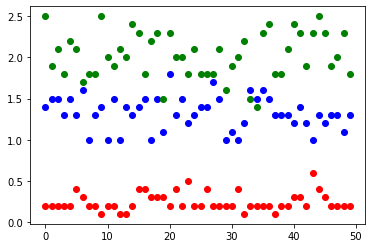

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)
plt.scatter(x,data.data[:50,3],color='red') #petal width of Setosa
plt.scatter(x,data.data[50:100,3],color='blue') #petal width of Versicolour 
plt.scatter(x,data.data[100:,3],color='green') #petal width of Virginica

เช็ค pental length ข้อมูลถูกแบ่งแยกเป็นคลาสอย่างชัดเจน

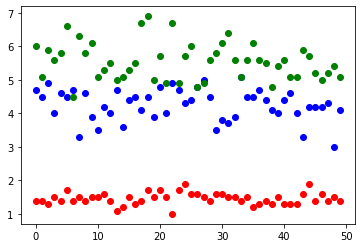

In [4]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

ขั้นตอนต่อไป คือการแบ่งข้อมูลเพื่อกันไม่ให้โมเดลเรียนรู้มากเกินไป (Overfitting)

แบ่งข้อมูลด้วยฟังก์ชั่น train_test_split แยกข้อมูลออกเป็น ส่วนสำหรับการฝึก 80% ส่วนสำหรับการทดสอบ  20%

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data[:,2:4], data.target, test_size=0.2, random_state=42,stratify=data.target)
print('Train Shape X: {} Y : {}'.format(X_train.shape,y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,y_test.shape))

Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


สร้างโมเดล K-NN แล้วด้วยการเรียก Library KNeighborsClassifier  จะเลือกเพื่อนบ้านที่ใกล้เคียงกับข้อมูลของเราเพียง 1 คน

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

ฝึกฝนโมเดลด้วยคำสั่ง fit(X,y) โดยให้ใส่ข้อมูลฝึกฝนที่ X และเฉลยที่ y

In [7]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

ทดสอบโมเดลโดยการนำชุดข้อมูลทดสอบเข้าไปทำนายด้วยคำสั่ง predict() โดยไม่ต้องใส่เฉลยเข้าไป ให้ใส่แค่ข้อมูลที่ต้องการทดสอบ

In [8]:
answer = knn.predict(X_test)

ทำ Evaluate-Test นั้นคือการตรวจสอบว่าโมเดลของเราแม่นยำขนาดไหน

จะใช้ classification_report ที่สามารถดึงค่า precision , recall , f1-score จากการเทียบระหว่างสิ่งที่โมเดลทำนายกับเฉลย

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



คลาส 0 เราไม่มีปัญหา เพราะถ้าย้อนไปดูกราฟจะพบว่ามันแยกออกมาจาก 1,2 อย่างชัดเจน แต่ข้อมูล 1,2 นั้นใกล้กันเกินไป ทำให้ทำนายผิดพลาด

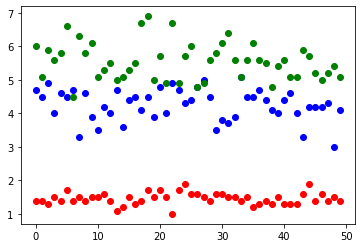

In [10]:
plt.scatter(x,data.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,data.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,data.data[100:,2],color='green') #petal length of Virginica

สีเขียวกับสีฟ้าข้อมูลมันจะทับกัน  จะทำให้ข้อมูลมันออกห่างกัน โดยใช้ การ Scale คือการปรับ Variance และ mean ของข้อมูลให้มีค่ากลางมากขึ้น
ทำด้วยการเรียก StandardScaler จาก sklearn จากนั้นก็แปลงค่าด้วยคำสั่ง fit_transform() 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data.data[:,2:4])

แบ่งข้อมูลอีกครั้ง

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, data.target, test_size=0.2, random_state=42,stratify=data.target)

In [13]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)#ฝึกโมเดล
#ทดสอบโมเดล
answer = knn.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



ใช้ GridSearchCV โดย GrideSearchCV จะทำการหาตั้งแต่ n จนถึง m  เราเรียกกระบวนการปรับค่า Hyper parameter แบบนี้ว่า Tuning Machine Learning Model / Tune Model / Tune Hyper paramete

Machine Learning Model ที่ต้องการปรับ (knn)
Hyper parameter ที่ต้องการปรับและ range ที่ต้องการทดสอบ (parameters)
จำนวนรอบการทดสอบต่อ 1 parameter (cv)

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
knn_best.best_estimator_

KNeighborsClassifier(n_neighbors=4)

ค่าเพื่อนบ้านที่ดีที่สุดคือ “4”  ไม่ใช่ 1

In [15]:
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



เรียก accuracy_score , precision_score , recall_score , f1_score  เพื่อทำการเช็คความแม่นยำของโมเดล

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, answer)

1.0

In [18]:
from sklearn.metrics import precision_score
precision_score(y_test, answer, average='weighted')

1.0

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, answer, average='weighted')

1.0

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, answer, average='macro')

1.0

sklearn สามารถรวมเอา precision,recall และ f1_score เข้าด้วยกันด้วยคำสั่งเดียวได้ด้วย classification_report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

